              YEAR         JAN         FEB         MAR         APR  \
count   117.000000  117.000000  117.000000  117.000000  117.000000   
mean   1959.000000   23.687436   25.597863   29.085983   31.975812   
std      33.919021    0.834588    1.150757    1.068451    0.889478   
min    1901.000000   22.000000   22.830000   26.680000   30.010000   
25%    1930.000000   23.100000   24.780000   28.370000   31.460000   
50%    1959.000000   23.680000   25.480000   29.040000   31.950000   
75%    1988.000000   24.180000   26.310000   29.610000   32.420000   
max    2017.000000   26.940000   29.720000   32.620000   35.380000   

              MAY         JUN         JUL         AUG         SEP         OCT  \
count  117.000000  117.000000  117.000000  117.000000  117.000000  117.000000   
mean    33.565299   32.774274   31.035897   30.507692   30.486752   29.766581   
std      0.724905    0.633132    0.468818    0.476312    0.544295    0.705492   
min     31.930000   31.100000   29.760000   2

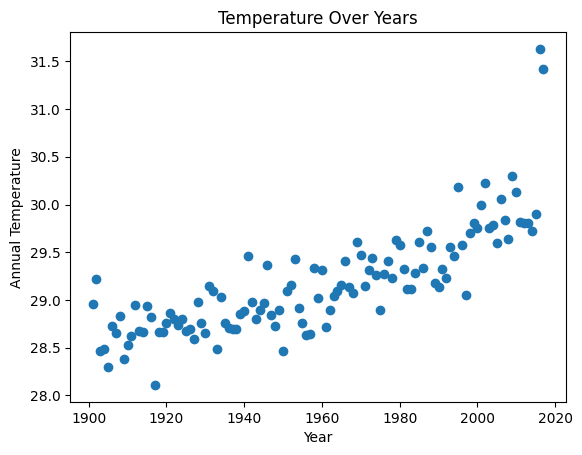

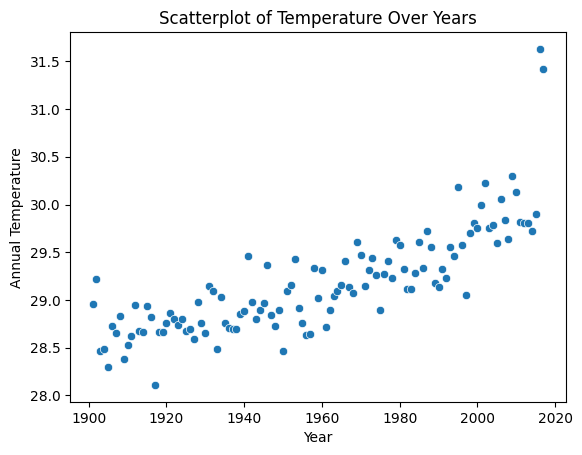

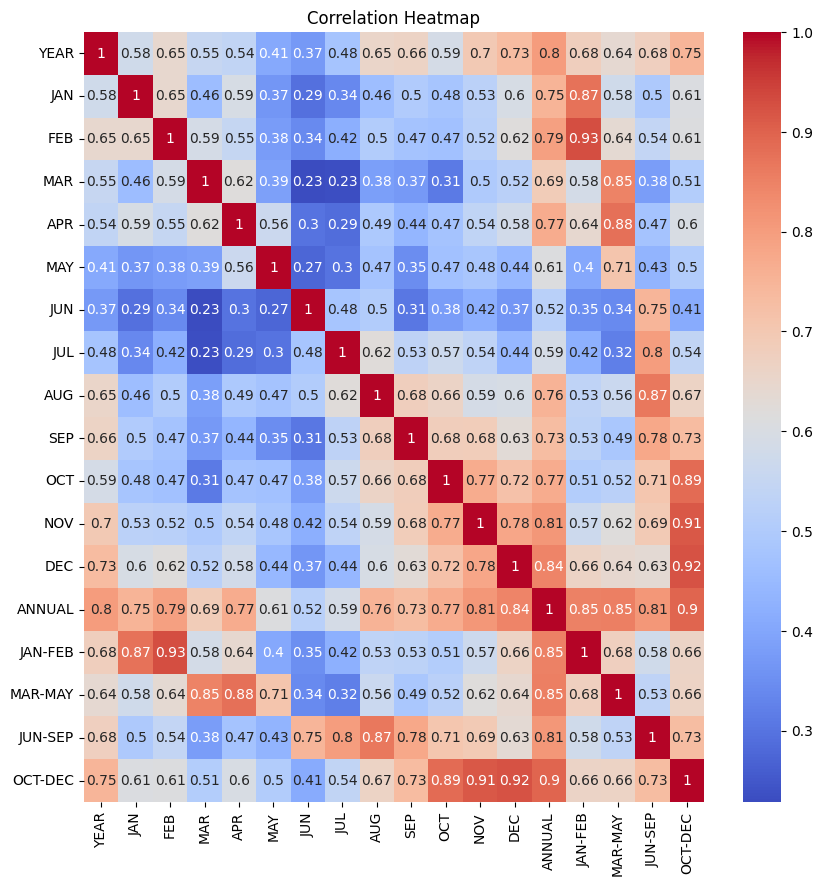

JAN - MSE: 0.5285626287719306, MAE: 0.5220295907600104, R2: 0.41999343079141704
FEB - MSE: 0.7094316190322201, MAE: 0.5941004406085901, R2: 0.5534780026916302
MAR - MSE: 0.9798011229130275, MAE: 0.7718144812314737, R2: 0.3486164185809315
APR - MSE: 0.74826615492424, MAE: 0.6782681999450079, R2: 0.27487000387221183
MAY - MSE: 0.4445618503398803, MAE: 0.5369493624684301, R2: 0.21928484439696516
JUN - MSE: 0.3850772181749755, MAE: 0.5082262915704155, R2: 0.037816110204246134
JUL - MSE: 0.18676507456640326, MAE: 0.32209437326912876, R2: 0.12845205403361792
AUG - MSE: 0.15267001943080125, MAE: 0.2991464462953874, R2: 0.1878529497152457
SEP - MSE: 0.08503782101344824, MAE: 0.22214220496321674, R2: 0.551644884275631
OCT - MSE: 0.4525186506320279, MAE: 0.5187712439816246, R2: 0.1738207716960225
NOV - MSE: 0.38166445054395387, MAE: 0.45691010570395607, R2: 0.5032642230456971
DEC - MSE: 0.40793729359218694, MAE: 0.41595204119194285, R2: 0.5343914482347869


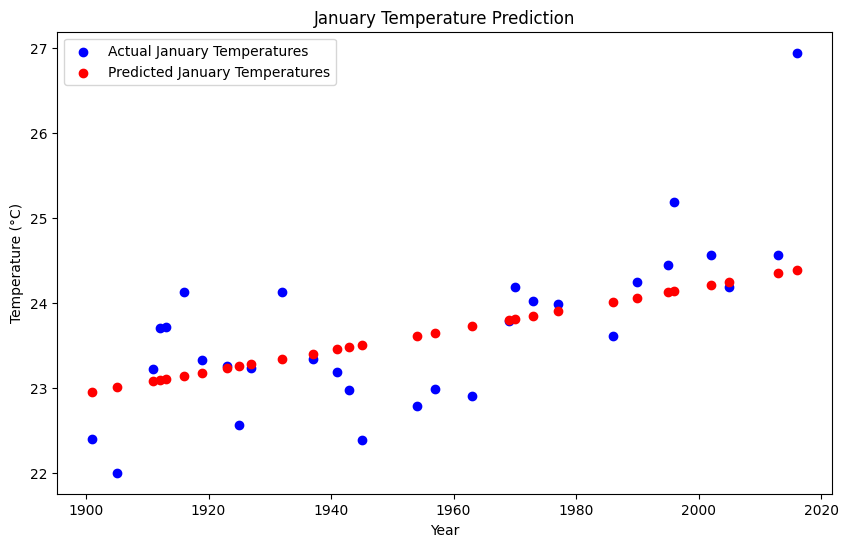

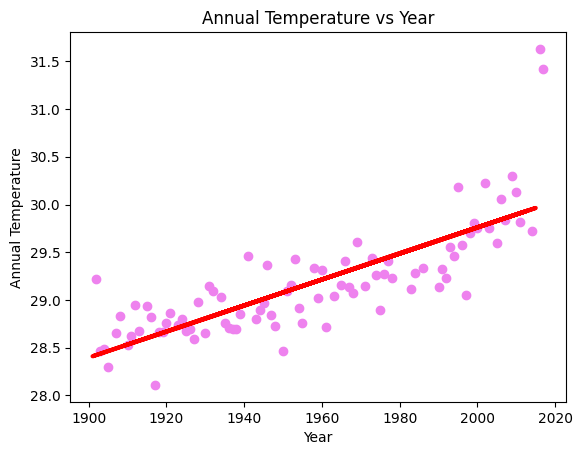

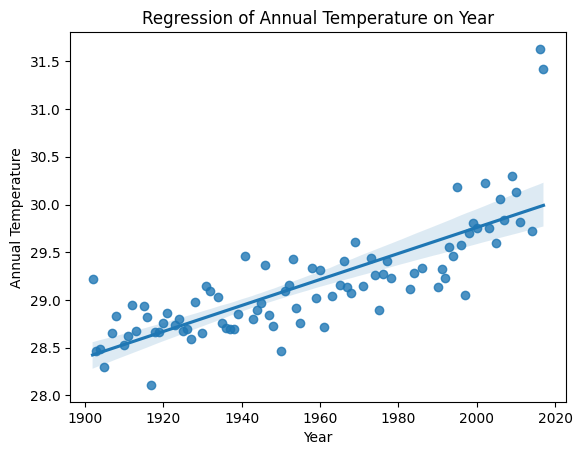

MSE (Annual): 0.062191413771857
MAE (Annual): 0.1933033227363456
R-Square (Annual): 0.7124685940060516


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load data
data = pd.read_csv('temperatures.csv')
df = data

# Basic statistics
print(data.describe())

# Visualize annual temperature over the years
x = data["YEAR"]
y = data["ANNUAL"]
plt.plot(x, y, 'o')
plt.xlabel("Year")
plt.ylabel("Annual Temperature")
plt.title("Temperature Over Years")
plt.show()

sns.scatterplot(x=x, y=y)
plt.xlabel("Year")
plt.ylabel("Annual Temperature")
plt.title("Scatterplot of Temperature Over Years")
plt.show()

# Correlation heatmap to observe the relationships between different months and annual temperature
plt.figure(figsize=(10, 10))
cor = df.corr()
sns.heatmap(data=cor, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# --- For Month-wise Temperature Prediction ---
# Select YEAR as the feature and each month as separate target variables
X = df[['YEAR']]
y = df[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']]

# Train-test split (for month-wise prediction)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Multi-output regression for month-wise temperature prediction
model = MultiOutputRegressor(LinearRegression())
model.fit(X_train, y_train)

# Predict for each month
y_pred = model.predict(X_test)

# Evaluate performance for each month
mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')
mae = mean_absolute_error(y_test, y_pred, multioutput='raw_values')
r2 = r2_score(y_test, y_pred, multioutput='raw_values')

# Display evaluation metrics for each month
months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
for i, month in enumerate(months):
    print(f"{month} - MSE: {mse[i]}, MAE: {mae[i]}, R2: {r2[i]}")

# --- Visualization of Month-wise Predictions ---
# Visualize predictions vs actuals for each month (For example, January)
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test['JAN'], color='blue', label='Actual January Temperatures')
plt.scatter(X_test, y_pred[:, 0], color='red', label='Predicted January Temperatures')
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.title("January Temperature Prediction")
plt.legend()
plt.show()

# --- For Annual Temperature Prediction ---
# Reshape x for model fitting (Annual temperature prediction)
x = data["YEAR"].values.reshape(-1, 1)
y_annual = data["ANNUAL"]

# Train-test split (for annual prediction)
x_train, x_test, y_train, y_test = train_test_split(x, y_annual, test_size=0.25)

# Model training for annual temperature prediction
model_annual = LinearRegression()
model_annual.fit(x_train, y_train)
y_pred_annual = model_annual.predict(x_test)

# Visualize annual temperature vs year (Regression Line)
plt.scatter(x_train, y_train, color='violet')
plt.plot(x_test, y_pred_annual, color='red', linewidth=3)
plt.title("Annual Temperature vs Year")
plt.xlabel("Year")
plt.ylabel("Annual Temperature")
plt.show()

# Regression plot with seaborn (Annual temperature)
sns.regplot(x=x_train.flatten(), y=y_train)
plt.xlabel("Year")
plt.ylabel("Annual Temperature")
plt.title("Regression of Annual Temperature on Year")
plt.show()

# Performance metrics for annual temperature prediction
print(f"MSE (Annual): {mean_squared_error(y_test, y_pred_annual)}")
print(f"MAE (Annual): {mean_absolute_error(y_test, y_pred_annual)}")
print(f"R-Square (Annual): {r2_score(y_test, y_pred_annual)}")
